In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [80]:
df_size = pd.read_csv('project_size.csv')
df_popularity = pd.read_csv('popularity.csv')
df_dep_type = pd.read_csv('dependency_type.csv')
df_freq = pd.read_csv('time_frequency.csv')

In [82]:
df_size

,Artifact,ReleaseCount
0,com.google.apis:google-api-services-adsense,4639
1,org.wso2.identity.apps:console,3614
2,org.wso2.identity.apps:myaccount,3568
3,com.google.apis:google-api-services-youtubeAna...,3281
4,com.google.apis:google-api-services-genomics,3158
...,...,...
634998,com.appstractive:jwt-hmac-kt-android,1
634999,io.gitee.ssoss:hutool-parent,1
635000,io.github.skylarkarms:concurrents-lazy_holder,1
635001,com.abysscat:catutils,1


In [102]:
df_popularity

,Artifact,Popularity
0,com.google.apis:google-api-services-adsense,0
1,org.wso2.identity.apps:myaccount,0
2,org.wso2.identity.apps:console,0
3,com.google.apis:google-api-services-youtubeAna...,0
4,com.google.apis:google-api-services-genomics,0
...,...,...
852275,org.lwapp:lwapp-dropwizard-core,0
852276,com.simple:simplespec_2.10.2,0
852277,org.typelevel:cats-testkit_2.13,2
852278,com.azure:azure-security-keyvault-secrets,45


In [103]:
df_dep_type

,Artifact,DependencyType
0,com.amazonaws:aws-java-sdk,compile
1,software.amazon.awssdk:aws-sdk-java,compile
2,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,compile
3,io.streamnative:pulsar-presto-connector-original,compile
4,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,compile
...,...,...
1004323,com.jfinal:jfinal_weixin,provided
1004324,com.jfinal:jfinal_weixin,test
1004325,com.github.fabienbarbero:sql-api,compile
1004326,org.hibernate.gson-jbossmodules:gson-jbossmodules,provided


In [83]:
# Reused code from time_updates.ipynb
df_freq['ReleaseDate'] = pd.to_datetime(df_freq['ReleaseTimestamp'], unit='ms')
df_freq = df_freq.sort_values(by=['Project', 'ReleaseDate'])
df_freq['TimeBetweenUpdates'] = df_freq.groupby('Project')['ReleaseDate'].diff().dt.days
df_freq = df_freq.groupby('Project')['TimeBetweenUpdates'].agg(['mean']).reset_index()
df_freq

,Project,mean
0,com.google.apis:google-api-services-adsense,0.792583
1,com.google.apis:google-api-services-genomics,0.884067
2,com.google.apis:google-api-services-youtubeAna...,1.060671
3,org.wso2.carbon.apimgt:apimgt,0.880728
4,org.wso2.carbon.apimgt:apimgt-feature,0.881322
5,org.wso2.carbon.apimgt:carbon-apimgt,0.880391
6,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,0.881659
7,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,0.881322
8,org.wso2.identity.apps:console,0.253806
9,org.wso2.identity.apps:myaccount,0.255397


In [84]:
# Edit datasets so there are no duplicate columns
df_popularity.drop("UpdateCount", axis=1, inplace=True)
df_dep_type.drop("Count", axis=1, inplace=True)
df_freq.rename(columns={"Project": "Artifact", "mean": "UpdateFreq"}, inplace=True)

In [87]:
# merge it all together
df = pd.merge(df_size, df_popularity, on='Artifact')
df = pd.merge(df, df_freq, on='Artifact')
df = pd.merge(df, df_dep_type, on='Artifact')
df

,Artifact,ReleaseCount,Popularity,UpdateFreq,DependencyType
0,com.google.apis:google-api-services-adsense,4639,0,0.792583,compile
1,com.google.apis:google-api-services-youtubeAna...,3281,0,1.060671,compile
2,com.google.apis:google-api-services-genomics,3158,0,0.884067,compile
3,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,0,0.881322,compile
4,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,3,0.881322,compile
5,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,0,0.881659,compile
6,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,0,0.881659,test
7,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,0,0.881659,provided


In [88]:
df.isnull().sum()


Artifact          0
ReleaseCount      0
Popularity        0
UpdateFreq        0
DependencyType    0
dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Artifact        8 non-null      object 
 1   ReleaseCount    8 non-null      int64  
 2   Popularity      8 non-null      int64  
 3   UpdateFreq      8 non-null      float64
 4   DependencyType  8 non-null      object 
dtypes: float64(1), int64(2), object(2)
memory usage: 452.0+ bytes


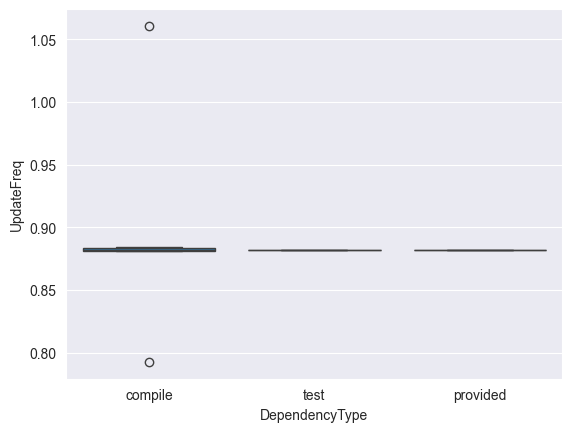

In [90]:
# Show a boxplot of how dependency time influences update frequency
sns.boxplot(data=df, x="DependencyType", y="UpdateFreq")
plt.show()

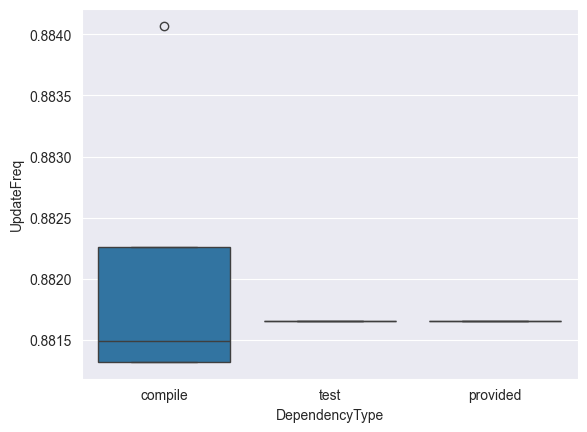

In [91]:
# Delete outliers for better visibility
filt_df = df[df["UpdateFreq"] < 1]
filt_df = filt_df[filt_df["UpdateFreq"] > 0.80]
sns.boxplot(data=filt_df, x="DependencyType", y="UpdateFreq")
plt.show()

In [92]:
# Convert dependency type to dummies
dummy_df = pd.get_dummies(df, columns=["DependencyType"], drop_first=False)
dummy_df


,Artifact,ReleaseCount,Popularity,UpdateFreq,DependencyType_compile,DependencyType_provided,DependencyType_test
0,com.google.apis:google-api-services-adsense,4639,0,0.792583,True,False,False
1,com.google.apis:google-api-services-youtubeAna...,3281,0,1.060671,True,False,False
2,com.google.apis:google-api-services-genomics,3158,0,0.884067,True,False,False
3,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,0,0.881322,True,False,False
4,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,3,0.881322,True,False,False
5,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,0,0.881659,True,False,False
6,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,0,0.881659,False,False,True
7,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,0,0.881659,False,True,False


In [93]:
# See correlation of variables to update frequency
df_temp = dummy_df.drop("Artifact", axis=1, inplace=False)
df_temp.corr()["UpdateFreq"]

ReleaseCount              -0.388464
Popularity                -0.063908
UpdateFreq                 1.000000
DependencyType_compile     0.094831
DependencyType_provided   -0.062081
DependencyType_test       -0.062081
Name: UpdateFreq, dtype: float64

We can see that Release Count has the biggest influence on Update Frequency, we can verify it with coefficients from linear regression

In [94]:
X = df_temp.drop(columns=["UpdateFreq"])
y = df_temp["UpdateFreq"]

model = LinearRegression()
model.fit(X, y)

print("Feature Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Feature Coefficients: [-6.67365821e-05 -1.59319101e-02  3.16390506e-02 -1.58195253e-02
 -1.58195253e-02]
Intercept: 1.095485764004359


Again, the first variable (ReleaseCount) has the biggest influence, we can also check a decission tree model, on which variable it will be deciding in the first node

[Text(0.7142857142857143, 0.9166666666666666, 'ReleaseCount <= 3960.0\nsquared_error = 0.005\nsamples = 8\nvalue = 0.893'),
 Text(0.5714285714285714, 0.75, 'ReleaseCount <= 3219.5\nsquared_error = 0.004\nsamples = 7\nvalue = 0.907'),
 Text(0.6428571428571428, 0.8333333333333333, 'True  '),
 Text(0.42857142857142855, 0.5833333333333334, 'ReleaseCount <= 3062.5\nsquared_error = 0.0\nsamples = 6\nvalue = 0.882'),
 Text(0.2857142857142857, 0.4166666666666667, 'DependencyType_compile <= 0.5\nsquared_error = 0.0\nsamples = 5\nvalue = 0.882'),
 Text(0.14285714285714285, 0.25, 'squared_error = 0.0\nsamples = 2\nvalue = 0.882'),
 Text(0.42857142857142855, 0.25, 'Popularity <= 1.5\nsquared_error = 0.0\nsamples = 3\nvalue = 0.881'),
 Text(0.2857142857142857, 0.08333333333333333, 'squared_error = 0.0\nsamples = 2\nvalue = 0.881'),
 Text(0.5714285714285714, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 0.881'),
 Text(0.5714285714285714, 0.4166666666666667, 'squared_error = 0.0\nsa

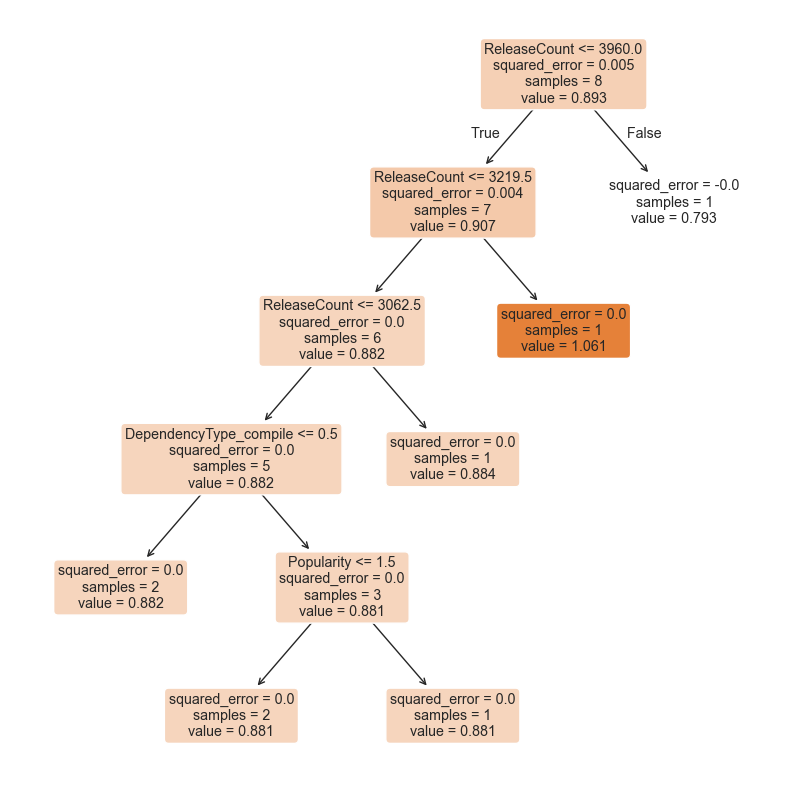

In [95]:
X = df_temp.drop(columns=["UpdateFreq"])
y = df_temp["UpdateFreq"]

clf = DecisionTreeRegressor(random_state=66) 
clf.fit(X, y)
plt.figure(figsize=(10,10))
plot_tree(clf, filled=True, feature_names=X.iloc[:,:].columns, class_names=True, rounded=True)

Also the decission tree uses Release Count variable as the first decission node, now we have to check statistical significance

In [96]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ReleaseCount             8 non-null      int64
 1   Popularity               8 non-null      int64
 2   DependencyType_compile   8 non-null      bool 
 3   DependencyType_provided  8 non-null      bool 
 4   DependencyType_test      8 non-null      bool 
dtypes: bool(3), int64(2)
memory usage: 284.0 bytes


In [109]:
import statsmodels.api as sm

# covert bool types to int 
X = X.astype({'DependencyType_compile': 'int',
              'DependencyType_provided': 'int',
              'DependencyType_test': 'int'})
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             UpdateFreq   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                 -0.766
Method:                 Least Squares   F-statistic:                    0.2412
Date:                Fri, 29 Nov 2024   Prob (F-statistic):              0.898
Time:                        19:52:04   Log-Likelihood:                 11.065
No. Observations:                   8   AIC:                            -12.13
Df Residuals:                       3   BIC:                            -11.73
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\tom\poly\cloud\LOG8415-Final\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


The p value for ReleaseCount is 0.413, so it is not statistically significant. We also tried deleting different variables to see, if it would change the values, but no improvement. Another approach we tried instead of using dummies for dependency type, we converted them to nummeric values, but also no improvement in p value. As the last step, we tried to visualize correlation matrix to see, if there is any multicolinearity, but there isnt any.


Thus, we cannot conclude that changes in ReleaseCount meaningfully influence the frequency of updates in the project.

                         ReleaseCount  Popularity  DependencyType_compile  \
ReleaseCount                 1.000000   -0.190248                0.290608   
Popularity                  -0.190248    1.000000                0.218218   
DependencyType_compile       0.290608    0.218218                1.000000   
DependencyType_provided     -0.190248   -0.142857               -0.654654   
DependencyType_test         -0.190248   -0.142857               -0.654654   

                         DependencyType_provided  DependencyType_test  
ReleaseCount                           -0.190248            -0.190248  
Popularity                             -0.142857            -0.142857  
DependencyType_compile                 -0.654654            -0.654654  
DependencyType_provided                 1.000000            -0.142857  
DependencyType_test                    -0.142857             1.000000  


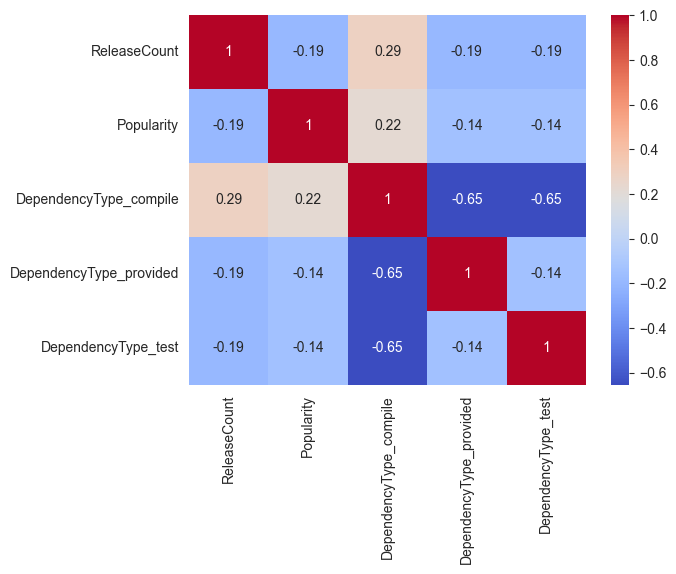

In [105]:
corr_matrix = X.corr()
print(corr_matrix)

# Visualize using a heatmap

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()
